At the start we assume that the particle distribution is Generally obbeying to a Gaussian Distribution of $\frac{1}{\sqrt{2\pi}\sigma}*e^{-\frac{(x-\mu)^2}{2*\sigma^2}}$. 
Then, it is easy to write the diistribution of $\theta, \phi, r$ speratelly:

\begin{equation}
\theta: \frac{1}{\sqrt{2\pi}\sigma_{\theta}}exp(-\frac{(\theta-\theta_0)^2}{2\sigma_{\theta}^2})
\tag{1}
\end{equation}

\begin{equation}
\phi: \frac{1}{\sqrt{2\pi}\sigma_{\phi}}exp(-\frac{(\phi-\phi_0)^2}{2\sigma_{\phi}^2})
\tag{2}
\end{equation}

\begin{equation}
r: \frac{1}{\sqrt{2\pi}\sigma_{r}}exp(-\frac{(r-r_0)^2}{2\sigma_{r}^2})
\tag{3}

(Gaussian)
\end{equation}

or

\begin{equation}
r: exp(-A(r+r_0))
\tag{3'}

(e-power decay)
\end{equation}


$\sigma_{\theta}, \sigma_{\phi}, \sigma_{r}$ are the standard deviation; $\theta_0, \phi_0, r_0$ are the central of the distribution(AKA mean); A is the decaying constant.

The equations from (1) to (3) give us the decay possibility/precentage distribution of a particle whose decay obbeys Gaussian Distribution. Generally, we imagaine a spherical coordinates with color, red indicates there are a strong possibility of decaying or observing decay, while blue means a low possibility. 

In this model, we assume that the $\theta, \phi, r$ are all independent to each other. The distribution combining $\phi, \theta, r$ distribution will be describe as such:

Near the $\theta_0$ and the $\phi_0$, the angular distribution has a high possibility of decaying, the more the angle away from $\theta_0$ and the $\phi_0$, the bluer the figure will be; and the futher away from the center point, the bluer the figure will be. 


Now, there's a little problem, which is how do we arrange the relations between (1), (2) and (3') in order that we can express this model correctly. According to probability theory, if two events are independent, statistically independent, or stochastically independent, then the possibility can be described by simply mutiplying all the distributions. 
So, we have a general distribution in spherical coordinate equation of following:

\begin{equation}
f= {(\frac{1}{2\pi\sigma_{\theta}\sigma_{\phi}})}exp(-A(r+r0)-\frac{(\phi-\phi_0)^2}{2\sigma_{\phi}^2}-\frac{(\theta-\theta_0)^2}{2\sigma_{\theta}^2})
\tag{4}
\end{equation}

the size of rm is  (25, 25)
the size of thetam is  (25, 25, 25)
the size of phim is  (25, 25, 25)
the size of xm is  (25, 25, 25)
the size of ym is  (25, 25, 25)
the size of zm is  (25, 25, 25)
the size of x is  (125, 125)
the size of y is  (125, 125)
the size of z is  (125, 125)
the size of pm is  (25, 25, 25)
the size of p is  (125, 125)


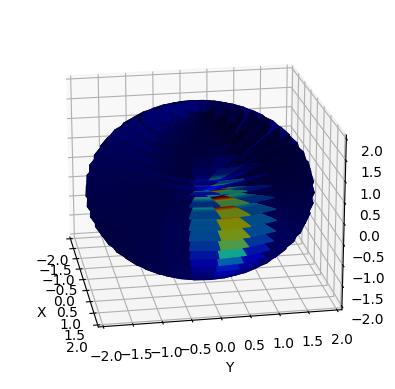

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function to plot
def f(theta, phi, r):
    return np.sin(phi)

# Define the range of theta and phi
#theta from 0 to 2pi, picking k^2 points
k=5
k2=k*k
theta = np.linspace(-np.pi, np.pi, k2)
phi = np.linspace(0, np.pi, k2)
r=np.linspace(0, 2, k2)
e=2.718
#A is a decaying constant which I dont know how to be accrute about it, but if A has a range of (0,1), the whole intergal of r will be odd. It will be demonstrate later.
A=1.5
#r0 stands for the radius of the smallest distance between the detector and the IP
r0=-0.8
#phi0 and
phi0=np.pi/2
theta0=0
sigmaphi=3.14159/8
sigmatheta=3.14159/16
sigmar=0.5

# Create a meshgrid from theta and phi
theta, phi = np.meshgrid(theta, phi)

phim = np.repeat(phi[:, np.newaxis], k2, axis=1)
thetam = np.repeat(theta[:, np.newaxis], k2, axis=1)
rm = np.repeat(r[:, np.newaxis], k2, axis=1)

print('the size of rm is ', rm.shape)
print('the size of thetam is ', thetam.shape)
print('the size of phim is ', phim.shape)

# Calculate the Cartesian coordinates
# There is a Problem since the Matrix is strict generated and mutiplied, so every element is mutilplied by the cprresponding element of the other
# Matrix. That is, the first element in phi only multiplied by the first element in theta. 
# Hence, if we set the theta = np.linespace(0, 2*np.pi, 100), we only get half the figure.

xm = rm*np.sin(phim) * np.cos(thetam)
ym = rm*np.sin(phim) * np.sin(thetam)
zm = rm*np.cos(phim)
print('the size of xm is ', xm.shape)
print('the size of ym is ', ym.shape)
print('the size of zm is ', zm.shape)
# Reshape Z to a 2-D array
#x = xm.reshape(-2, zm.shape[-2])
#y = ym.reshape(-2, zm.shape[-2])
z = zm.reshape(k2*k, k2*k)
x = xm.reshape(k2*k, k2*k)
y = ym.reshape(k2*k, k2*k)
print('the size of x is ', x.shape)
print('the size of y is ', y.shape)
print('the size of z is ', z.shape)
#print(x)
# the probability distribution function

pm = (1 / (2 * np.pi * sigmaphi * sigmatheta)) * np.exp((-A * (r0 + rm)) - ((thetam - theta0) ** 2 / (2 * sigmatheta ** 2)) - ((phim - phi0) ** 2 / (2 * sigmaphi ** 2)))
#or
#p = (1 / (2 * np.pi * sigmaphi * sigmatheta)*np.sqrt(2 * np.pi * sigmar)) * np.exp((-A * (r0 + r))
# -((theta - theta0) ** 2 / (2 * sigmatheta ** 2)) - ((phi - phi0) ** 2 / (2 * sigmaphi ** 2)))
#This is the pure Gaussian Distribution
print('the size of pm is ', pm.shape)
# Create the figure and the 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

p=pm.reshape(k2*k, k2*k)
print('the size of p is ', p.shape)
# Plot the surface
ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=plt.cm.jet(p))

# Set the axis limits and labels
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=20., azim=-10)
# Show the plot
plt.savefig('3d_plot.png')
plt.show()




the size of rm is  (25, 25)
the size of thetam is  (25, 25, 25)
the size of phim is  (25, 25, 25)
the size of xm is  (25, 25, 25)
the size of ym is  (25, 25, 25)
the size of zm is  (25, 25, 25)
the size of x is  (125, 125)
the size of y is  (125, 125)
the size of z is  (125, 125)
the size of pm is  (25, 25, 25)
the size of p is  (125, 125)


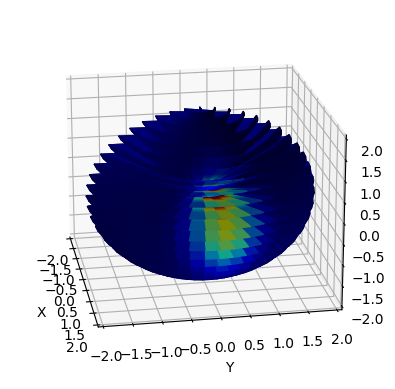

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function to plot
def f(theta, phi, r):
    return np.sin(phi)

# Define the range of theta and phi
#theta from 0 to 2pi, picking k^2 points
k=5
k2=k*k
theta = np.linspace(-np.pi/2, np.pi/2, k2)
phi = np.linspace(0, np.pi, k2)
r=np.linspace(0, 2, k2)
e=2.718
#A is a decaying constant which I dont know how to be accrute about it, but if A has a range of (0,1), the whole intergal of r will be odd. It will be demonstrate later.
A=1.5
#r0 stands for the radius of the smallest distance between the detector and the IP
r0=-0.8
#phi0 and
phi0=np.pi/2
theta0=0
sigmaphi=3.14159/8
sigmatheta=3.14159/16
sigmar=0.5

# Create a meshgrid from theta and phi
theta, phi = np.meshgrid(theta, phi)

phim = np.repeat(phi[:, np.newaxis], k2, axis=1)
thetam = np.repeat(theta[:, np.newaxis], k2, axis=1)
rm = np.repeat(r[:, np.newaxis], k2, axis=1)

print('the size of rm is ', rm.shape)
print('the size of thetam is ', thetam.shape)
print('the size of phim is ', phim.shape)

# Calculate the Cartesian coordinates
# There is a Problem since the Matrix is strict generated and mutiplied, so every element is mutilplied by the cprresponding element of the other
# Matrix. That is, the first element in phi only multiplied by the first element in theta. 
# Hence, if we set the theta = np.linespace(0, 2*np.pi, 100), we only get half the figure.

xm = rm*np.sin(phim) * np.cos(thetam)
ym = rm*np.sin(phim) * np.sin(thetam)
zm = rm*np.cos(phim)
print('the size of xm is ', xm.shape)
print('the size of ym is ', ym.shape)
print('the size of zm is ', zm.shape)
# Reshape Z to a 2-D array
#x = xm.reshape(-2, zm.shape[-2])
#y = ym.reshape(-2, zm.shape[-2])
z = zm.reshape(k2*k, k2*k)
x = xm.reshape(k2*k, k2*k)
y = ym.reshape(k2*k, k2*k)
print('the size of x is ', x.shape)
print('the size of y is ', y.shape)
print('the size of z is ', z.shape)
#print(x)
# the probability distribution function

pm = (1 / (2 * np.pi * sigmaphi * sigmatheta)) * np.exp((-A * (r0 + rm)) - ((thetam - theta0) ** 2 / (2 * sigmatheta ** 2)) - ((phim - phi0) ** 2 / (2 * sigmaphi ** 2)))
#or
#p = (1 / (2 * np.pi * sigmaphi * sigmatheta)*np.sqrt(2 * np.pi * sigmar)) * np.exp((-A * (r0 + r))
# -((theta - theta0) ** 2 / (2 * sigmatheta ** 2)) - ((phi - phi0) ** 2 / (2 * sigmaphi ** 2)))
#This is the pure Gaussian Distribution
print('the size of pm is ', pm.shape)
# Create the figure and the 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

p=pm.reshape(k2*k, k2*k)
print('the size of p is ', p.shape)
# Plot the surface
ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=plt.cm.jet(p))

# Set the axis limits and labels
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=20., azim=-10)
# Show the plot
plt.savefig('3d_plot.png')
plt.show()




Since we are more interested in how many particles can be detected in a certain area, it is natural that we do a integral within a given area. By observing the (3'), we can write an integral:

\begin{equation}
\int_{\phi_1}^{\phi_2} \int_{\theta_1}^{\theta_2} \int_{r_1}^{r_2} {(\frac{1}{2\pi\sigma_{\theta}\sigma_{\phi}})}exp(-A(r+r_0)-\frac{(\phi-\phi_0)^2}{2\sigma_{\phi}^2}-\frac{(\theta-\theta_0)^2}{2\sigma_{\theta}^2}) r^2 sin\theta dr d\phi d\theta

\tag5

\end{equation}

It can be easily sperated to 3 integral of $\theta, \phi, r$, we start by caculatin the r integral.

\begin{equation}
\int_{r_1}^{r_2} exp(-A(r+r_0)) r^2 dr=-\frac{1}{A}((r^2)exp(-A(r+r_0))+\frac{1}{A}2rexp(-A(r+r_0))+\frac{2}{A}exp(-A(r+r_0))-\frac{2}{A}exp(-Ar_0))|^{r_2}_{r_1}

\tag{6}

\end{equation}

The constant at the end $-\frac{2}{A}exp(-Ar_0)$ is added to make sure when $r_1=r_2$， the integral value is strictly zero. (That is when the radius of the detector is zeor, the whole integral should have the value of 0, for there will be no particle in the detector)

